### Data preparing

In [1]:
plt.style.use('bmh')
fsize = (6,4)

df = pd.read_csv('data/aave_v3_ethereum.csv')

# df['day_start'] = pd.to_datetime(df['day_start'].str[:10])
# df['report_month'] = pd.to_datetime(df['report_month'].str[:10])
df['start_month'] = df['day_start'].str[:7]
df['report_month'] = df['report_month'].str[:7]

# feature engineering
df['current_supply_perc'] = df.groupby('user').current_supply.apply(lambda x: x / (x.iloc[0] + 0.001))
df['current_borrow_perc'] = df.groupby('user').current_supply.apply(lambda x: x / (x.iloc[0] + 0.001))
df['report_num'] = df.groupby('user').report_month.cumcount() + 1

bins = [-np.inf, 0, 10, 1000, 10000, 100000, np.inf]
labs = ['0)0$', '1)0-10$', '2)10-1K$', '3)1K-10K$', '4)10K-100K$', '5)100K$+']
df['current_supply_cat'] = pd.cut(df['current_supply'], bins, labels = labs).astype(str)
df['amt_supply_cat'] = pd.cut(df['amt_supply'], bins, labels = labs).astype(str)

df['cnt_trnx'] = df[['cnt_supply','cnt_withdraw','cnt_borrow','cnt_repay']].sum(axis = 1)

df['current_borrow_flg'] = (df['current_borrow'] > 0).astype(int)
df['current_supply_flg'] = (df['current_supply'] > 0).astype(int)

df['amt_borrow_flg'] = (df['amt_borrow'] > 0).astype(int)
df['amt_supply_flg'] = (df['amt_supply'] > 0).astype(int)

df['interest'] = df.interest_borrow - df.interest_supply

print(df.shape)
df[-5:]

(36940, 34)


,user,day_start,report_month,cnt_tokens,cnt_tokens_supply,cnt_tokens_borrow,cnt_supply,cnt_withdraw,cnt_liquidate_supply,cnt_borrow,cnt_repay,cnt_liquidate_borrow,amt_supply,amt_withdraw,amt_liquidate_supply,amt_borrow,amt_repay,amt_liquidate_borrow,current_supply,current_borrow,interest_supply,interest_borrow,start_month,current_supply_perc,current_borrow_perc,report_num,current_supply_cat,amt_supply_cat,cnt_trnx,current_borrow_flg,current_supply_flg,amt_borrow_flg,amt_supply_flg,interest
36935,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-03,1,1,0,1,0,0,0,0,0,1.09,0.00,0.00,0.00,0.00,0.00,1.09,0.00,0.00,0.00,2023-03,1.00,1.00,1,1)0-10$,1)0-10$,1,0,1,0,1,-0.00
36936,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-04,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.14,0.00,0.00,0.00,2023-03,1.05,1.05,2,1)0-10$,0)0$,0,0,1,0,0,-0.00
36937,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-05,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.12,0.00,0.00,0.00,2023-03,1.03,1.03,3,1)0-10$,0)0$,0,0,1,0,0,-0.00
36938,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-06,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.13,0.00,0.00,0.00,2023-03,1.04,1.04,4,1)0-10$,0)0$,0,0,1,0,0,-0.00
36939,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-07,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.12,0.00,0.00,0.00,2023-03,1.03,1.03,5,1)0-10$,0)0$,0,0,1,0,0,-0.00


### Plots

In [3]:
df_ag = df.groupby(['report_num', 'start_month']).sum()

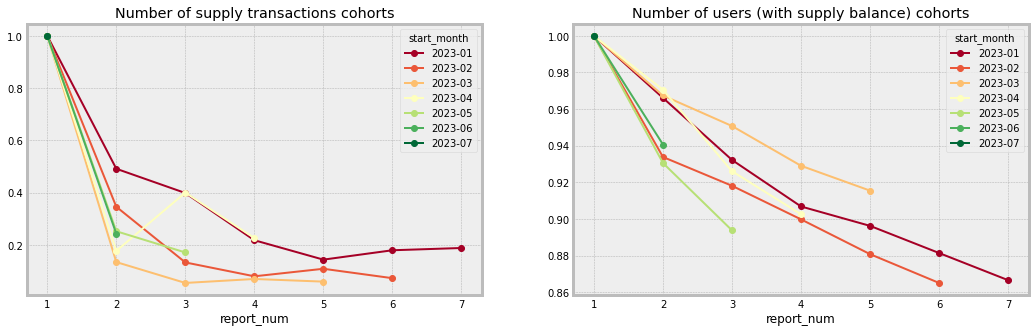

In [4]:
_, ax = plt.subplots(1,2, figsize = (16,5))
feat = 'cnt_supply'
df_st = df_ag[feat].unstack()
df_st = df_st/df_st.iloc[0]
_ = df_st.plot(ax = ax[0], title = 'Number of supply transactions cohorts', style = 'o-', cmap = 'RdYlGn')

feat = 'current_supply_flg'
df_st = df_ag[feat].unstack()
df_st = df_st/df_st.iloc[0]
_ = df_st.plot(ax = ax[1], title = 'Number of users (with supply balance) cohorts', style = 'o-', cmap = 'RdYlGn')

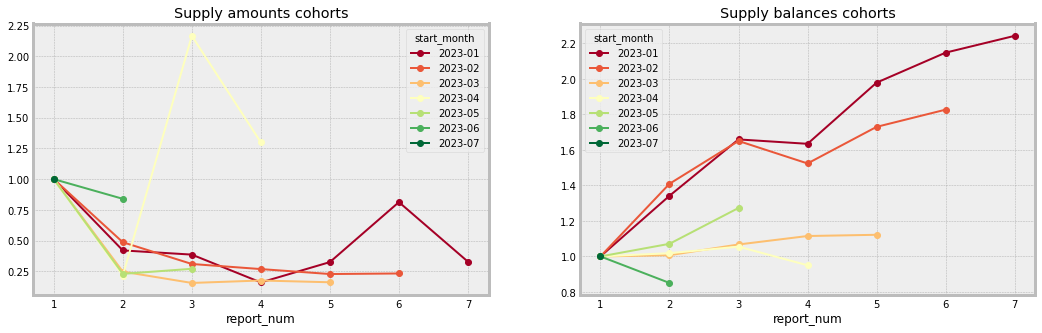

In [5]:
_, ax = plt.subplots(1,2, figsize = (16,5))
feat = 'amt_supply'
df_st = df_ag[feat].unstack()
df_st = df_st/df_st.iloc[0]
_ = df_st.plot(ax = ax[0], title = 'Supply amounts cohorts', style = 'o-', cmap = 'RdYlGn')

feat = 'current_supply'
df_st = df_ag[feat].unstack()
df_st = df_st/df_st.iloc[0]
_ = df_st.plot(ax = ax[1], title = 'Supply balances cohorts', style = 'o-', cmap = 'RdYlGn')